# 355.19: Drainage canal on top of confined aquifer

Drainage canal on top of a confined aquifer of finite thickness near an open boundary.

Constant drawdown of the water level in the canal.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bruggeman.flow2d import bruggeman_355_19, bruggeman_355_19_total_discharge

View the function.

In [2]:
bruggeman_355_19

View the docstring to get a description of the input parameters

In [3]:
help(bruggeman_355_19)

Help on LatexifiedFunction in module latexify.ipython_wrappers:

bruggeman_355_19 = <latexify.ipython_wrappers.LatexifiedFunction object>
    Drainage canal on a confined aquifer of finite thickness near open boundary.

    Constant drawdown of the water level in the canal.

    Parameters
    ----------
    x : float or np.ndarray
        distance from open boundary [L]
    z : float or np.ndarray
        depth below the top of the aquifer [L]
    L : float
        distance from open boundary to the middle of the canal [L]
    B : float
        half-width of the canal [L]
    h : float
        drawdown in the canal [L]
    k : float
        hydraulic conductivity of the aquifer [L/T]
    D : float
        thickness of the aquifer [L]

    Returns
    -------
    omega :
        complex potential at (x, z)



Define some aquifer parameters.

In [4]:
L = 20  # m
B = 5  # m
h = 1  # m
k = 10  # m/d
D = 20  # m

Compute the solution.

In [5]:
nx, nz = 100, 100
x, z = np.meshgrid(np.linspace(0, 2 * L, nx), np.linspace(0, D, nz))
om = np.zeros((nz, nx), dtype="complex")
for i in range(nx):
    for j in range(nz):
        om[i, j] = bruggeman_355_19(x[i, j], z[i, j], L, B, h, k, D)

Plot the result.

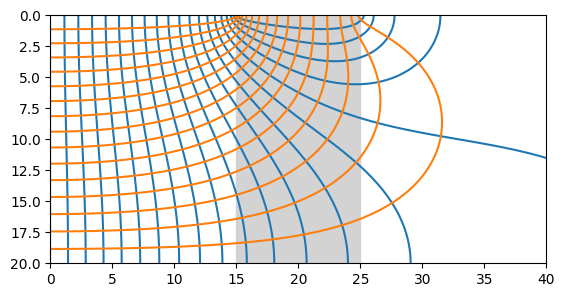

In [6]:
plt.subplot(111, aspect=1)
plt.contour(x, z, om.real, np.arange(0, 10, 0.5), colors="C0")
plt.contour(x, z, om.imag, np.arange(0, 10, 0.5), colors="C1")
plt.ylim(20, 0)  # z-axis is positive down
plt.axvspan(L - B, L + B, 0, 20, color="lightgrey");

Compute the total discharge:

In [7]:
bruggeman_355_19_total_discharge

In [8]:
q = bruggeman_355_19_total_discharge(L, B, h, k, D)
print(f"Total discharge: {float(q):.2f} m^2/d")

Total discharge: 7.91 m^2/d
